In [1]:
# Bring import for the lesson 
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

# =ignore warningn
import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

In [2]:
# Load data from the aquire module

df = get_store_data()
df.head(3)

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


### Summarize and learn about the data

In [3]:
df.shape

(913000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_date      913000 non-null  object 
 2   sale_id        913000 non-null  int64  
 3   item_brand     913000 non-null  object 
 4   item_id        913000 non-null  int64  
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_id       913000 non-null  int64  
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [5]:
# how many stores do work with 
df.store_id.unique() # unique values of  store_id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
# numbers of items
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [7]:
# number of unique sales dates
df.sale_date.nunique() 


1826

In [8]:
# First and last day of sales in our DF 
df.sale_date.min(), df.sale_date.max()


('Fri, 01 Apr 2016 00:00:00 GMT', 'Wed, 31 May 2017 00:00:00 GMT')

In [9]:
# learn about sales
df.sale_amount.describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sale_amount, dtype: float64

# 1
Convert date column to datetime format.

In [10]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

In [11]:
df.head()

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,2013-01-01 00:00:00+00:00,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,2013-01-02 00:00:00+00:00,2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,2013-01-03 00:00:00+00:00,3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,13.0,2013-01-04 00:00:00+00:00,4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,10.0,2013-01-05 00:00:00+00:00,5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


# 2
Plot the distribution of each of your variables.

<AxesSubplot:xlabel='sale_date'>

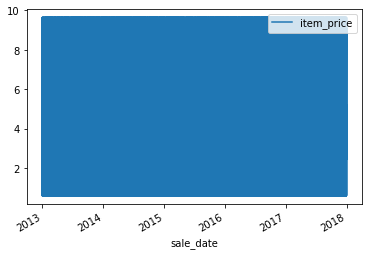

In [12]:
df.plot(x = 'sale_date', y = 'item_price')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   sale_amount    913000 non-null  float64            
 1   sale_date      913000 non-null  datetime64[ns, UTC]
 2   sale_id        913000 non-null  int64              
 3   item_brand     913000 non-null  object             
 4   item_id        913000 non-null  int64              
 5   item_name      913000 non-null  object             
 6   item_price     913000 non-null  float64            
 7   item_upc12     913000 non-null  int64              
 8   item_upc14     913000 non-null  int64              
 9   store_address  913000 non-null  object             
 10  store_city     913000 non-null  object             
 11  store_id       913000 non-null  int64              
 12  store_state    913000 non-null  object             
 13  store_zipcode  913000 non-nul

In [14]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            912990, 912991, 912992, 912993, 912994, 912995, 912996, 912997,
            912998, 912999],
           dtype='int64', length=913000)

# 3 
Set the index to be the datetime variable.

In [15]:
df.sample()

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
514431,106.0,2016-08-18 00:00:00+00:00,514432,Heinz,29,Heinz Tomato Ketchup - 2 Ct,8.65,13000001038,13000001038,9255 FM 471 West,San Antonio,2,TX,78251


In [16]:
# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()

In [17]:
df.sample()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2015-08-31 00:00:00+00:00,28.0,46623,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139,1015 S WW White Rd,San Antonio,6,TX,78220


# 4
Add a 'month' and 'day of week' column to your dataframe.